In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font' , family = 'NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 데이터셋 로딩( 출처 : https://www.kaggle.com/competitions/playground-series-s3e8/data)

In [ ]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

- carat : 캐럿(약 0.2g단위)
- cut : 품질
- color : 색깔 ( D가 가장 좋은 것 )
- clarity : 투명도
- depth : 보석의 깊이
- table : 보석의 테이블 크기
- x : 보석의 길이
- y : 보석의 너비
- z : 보석의 높이
- price : 가격

- 결측치 없음

# 각 feature들에 대한 조사

In [ ]:
train.head(20)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


<ipython-input-160-92583f079054>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , annot = True , fmt = '.2f')
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


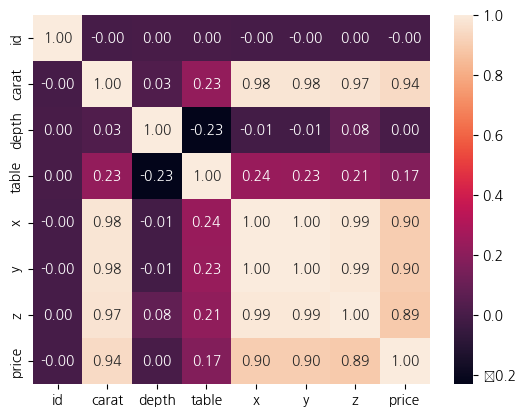

In [ ]:
sns.heatmap(train.corr() , annot = True , fmt = '.2f')

- depth는 x , y , z값에 따라 정해지기 때문에 , 그리고 price와의 상관관계도 없기 때문에 제거한다.

In [ ]:
train.shape , test.shape

((193573, 11), (129050, 10))

- feature에 변동이 있을 때 , train과 test를 둘 다 수행해야 하기 때문에  , 미리 합치기

In [ ]:
df = pd.concat([train , test])

In [ ]:
df.drop('depth' , axis = 1 , inplace = True)

In [ ]:
df.head(10)

,id,carat,cut,color,clarity,table,x,y,z,price
0,0,1.52,Premium,F,VS2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,59.0,7.65,7.61,4.77,14453.0
5,5,1.51,Very Good,J,SI1,58.0,7.34,7.29,4.59,7506.0
6,6,0.74,Ideal,E,VS2,57.0,5.76,5.79,3.57,3229.0
7,7,1.34,Premium,G,SI2,57.0,7.00,7.05,4.38,6224.0
8,8,0.30,Ideal,F,IF,56.0,4.35,4.37,2.70,886.0
9,9,0.30,Good,J,VS1,57.0,4.26,4.28,2.72,421.0


### clarity들의 좋은 순서
IF
VVS1
VVS2
VS1
VS2
SI1
SI2
I1
I2
I3


In [ ]:
clarity_list = df.clarity.unique()

In [ ]:
clarity_list

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
a = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']
b = [8,7,6,5,4,3,2,1]

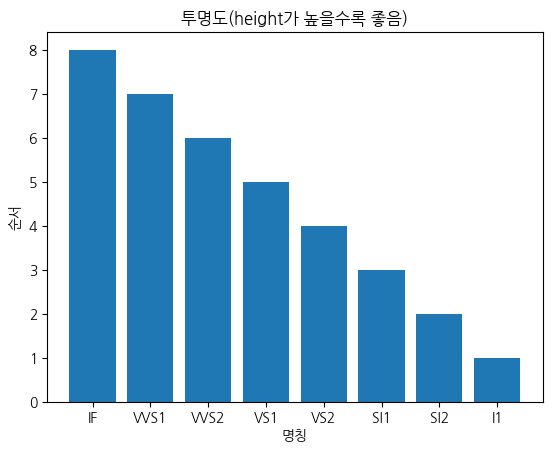

In [ ]:
plt.bar(a , b)
plt.xlabel('명칭')
plt.ylabel('순서')
plt.title('투명도(height가 높을수록 좋음)')
plt.show()

- 이 점수들을 투명도에 대입

In [ ]:
dic = {}
for i , j in zip(a,b):
  dic[i] = j

In [ ]:
dic

{'IF': 8,
 'VVS1': 7,
 'VVS2': 6,
 'VS1': 5,
 'VS2': 4,
 'SI1': 3,
 'SI2': 2,
 'I1': 1}

In [ ]:
df.clarity = df.clarity.map(dic)

In [ ]:
df.clarity

0         4
1         2
2         5
3         5
4         4
         ..
129045    6
129046    3
129047    6
129048    1
129049    2
Name: clarity, Length: 322623, dtype: int64

In [ ]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

- cut의 순서<br>
Ideal : 가장 좋음<br>
Premium<br>
Very Good<br>
Good<br>
Fair : 가장 나쁨<br>

In [ ]:
aa = ['Ideal','Premium','Very Good','Good','Fair']
bb = [5,4,3,2,1]

In [ ]:
dic2 = {}
for i , j in zip(aa , bb):
  dic2[i] = j

In [ ]:
df.cut = df.cut.map(dic2)

In [ ]:
df.head(10)

,id,carat,cut,color,clarity,table,x,y,z,price
0,0,1.52,4,F,4,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,3,J,2,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,5,G,5,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,5,G,5,56.0,4.38,4.41,2.71,666.0
4,4,1.70,4,G,4,59.0,7.65,7.61,4.77,14453.0
5,5,1.51,3,J,3,58.0,7.34,7.29,4.59,7506.0
6,6,0.74,5,E,4,57.0,5.76,5.79,3.57,3229.0
7,7,1.34,4,G,2,57.0,7.00,7.05,4.38,6224.0
8,8,0.30,5,F,8,56.0,4.35,4.37,2.70,886.0
9,9,0.30,2,J,5,57.0,4.26,4.28,2.72,421.0


In [ ]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [ ]:
alpa = ['D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
sc = [23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

In [ ]:
alpasc = {}
for i , j in zip(alpa , sc):
  alpasc[i] = j

In [ ]:
df.color = df.color.map(alpasc)

In [ ]:
df.head(10)

,id,carat,cut,color,clarity,table,x,y,z,price
0,0,1.52,4,21,4,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,3,17,2,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,5,20,5,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,5,20,5,56.0,4.38,4.41,2.71,666.0
4,4,1.70,4,20,4,59.0,7.65,7.61,4.77,14453.0
5,5,1.51,3,17,3,58.0,7.34,7.29,4.59,7506.0
6,6,0.74,5,22,4,57.0,5.76,5.79,3.57,3229.0
7,7,1.34,4,20,2,57.0,7.00,7.05,4.38,6224.0
8,8,0.30,5,21,8,56.0,4.35,4.37,2.70,886.0
9,9,0.30,2,17,5,57.0,4.26,4.28,2.72,421.0


# 모델링

## 전처리를 위해 합쳤던 train과 test 분리

In [ ]:
train.shape

(193573, 11)

In [ ]:
result_train = df.iloc[:193573 , 1:]
result_test = df.iloc[193573: , :-1]

In [ ]:
X = result_train.iloc[:,:-1]
y = result_train.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.25)

In [ ]:

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(1 , activation = 'linear'))
model.summary()


model.compile(optimizer ='adam', loss = 'mean_squared_error')


early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


modelpath="./data/model/predic_model"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)


history = model.fit(X_train, y_train, validation_split=1/3, epochs=100, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2304      
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19809 (77.38 KB)
Trainable params: 19809 (77.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
3025/3025 [==============================] - 11s 3ms/step - loss: 5941216.5000 - val_loss: 1352497.0000
Epoch 2/100
3025/3025 [===========

In [ ]:
model.predict(X_test)

1513/1513 [==============================] - 3s 2ms/step


array([[1479.5272],
       [7254.2573],
       [6193.581 ],
       ...,
       [ 648.6978],
       [5984.2803],
       [ 862.2071]], dtype=float32)

In [ ]:
y_test = y_test.reset_index().drop('index' , axis = 1)

In [ ]:
X_test = X_test.reset_index().drop('index' , axis = 1)

In [ ]:

real_prices =[]
pred_prices = []
X_num = []


n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
    real = y_test.to_numpy()[i][0]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

1513/1513 [==============================] - 2s 1ms/step
실제가격: 1415.00, 예상가격: 1479.53
실제가격: 7055.00, 예상가격: 7254.26
실제가격: 5914.00, 예상가격: 6193.58
실제가격: 3831.00, 예상가격: 4465.52
실제가격: 4363.00, 예상가격: 4685.94
실제가격: 672.00, 예상가격: 584.46
실제가격: 1200.00, 예상가격: 1170.60
실제가격: 8271.00, 예상가격: 8049.67
실제가격: 2681.00, 예상가격: 2952.74
실제가격: 4586.00, 예상가격: 5074.41
실제가격: 4270.00, 예상가격: 4443.58
실제가격: 912.00, 예상가격: 967.31
실제가격: 745.00, 예상가격: 769.63
실제가격: 1074.00, 예상가격: 1277.39
실제가격: 6221.00, 예상가격: 7410.46
실제가격: 6957.00, 예상가격: 7070.02
실제가격: 4737.00, 예상가격: 4898.87
실제가격: 1752.00, 예상가격: 1723.78
실제가격: 3016.00, 예상가격: 3630.76
실제가격: 1180.00, 예상가격: 1094.22
실제가격: 2112.00, 예상가격: 1946.52
실제가격: 750.00, 예상가격: 843.77
실제가격: 5858.00, 예상가격: 6512.83
실제가격: 4232.00, 예상가격: 4590.88
실제가격: 616.00, 예상가격: 658.41
실제가격: 943.00, 예상가격: 1220.54
실제가격: 2714.00, 예상가격: 2629.81
실제가격: 7267.00, 예상가격: 7214.11
실제가격: 1744.00, 예상가격: 1738.53
실제가격: 1348.00, 예상가격: 1392.90
실제가격: 8184.00, 예상가격: 10114.54
실제가격: 1872.00, 예상가격: 2213.78
실제가격: 847.00, 예상가격: 1057.

In [ ]:
pred_prices = np.array(pred_prices)

In [ ]:
pred_prices = np.where(pred_prices>0 , pred_prices , 0)

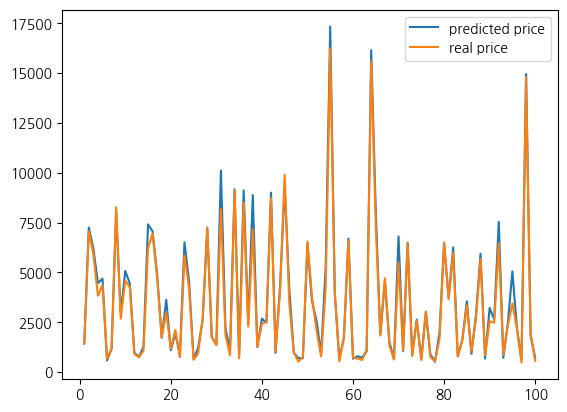

In [ ]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

- 두 그래프의 흐름이 비슷하다.

# 다른 페이지라고 가정하고 , 모델만을 불러와서 함수 작성 후 예측 실행

In [ ]:
del model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('./data/model/predic_model')

In [ ]:
a = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']
b = [8,7,6,5,4,3,2,1]
dic = {}
for i , j in zip(a,b):
  dic[i] = j

In [ ]:
aa = ['Ideal','Premium','Very Good','Good','Fair']
bb = [5,4,3,2,1]
dic2 = {}
for i , j in zip(aa , bb):
  dic2[i] = j

In [ ]:
alpa = ['D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
sc = [23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
alpasc = {}
for i , j in zip(alpa , sc):
  alpasc[i] = j

In [ ]:
def prediction(carat , cut , color , clarity , table , x , y , z):
  try:
    pre = pd.DataFrame({'carat' : [carat] , 'cut' : [cut] , 'color' : [color] , 'clarity' : [clarity] , 'table' : [table] , 'x' : [x] , 'y' : [y] , 'z' : [z]})
    pred = model.predict(pre).flatten()
    print()
    print(f'이 보석의 예상 금액은 {pred[0]}달러 입니다.')
  except:
    print('잘못 입력하셨습니다.')

In [ ]:
def inp():
  try:
    carat = float(input('몇 캐럿인지 입력하세요(숫자) :'))
    cut = input('품질을 입력하세요 : Premium , Very Good , Ideal , Good , Fair')
    color = input('색깔을 입력하세요 : (D to Z)')
    clarity = input('투명도를 입력하세요 : IF , VVS2 , VVS1 , VS2 , VS1 , SI2 , SI1 , I1')
    table = float(input('테이블 수치를 입력하세요(숫자) : '))
    x = float(input('가로 길이를 입력하세요(숫자) :'))
    y = float(input('세로 길이를 입력하세요(숫자) :'))
    z = float(input('높이 길이를 입력하세요(숫자) :'))

    clarity = dic[clarity]
    cut = dic2[cut]
    color = alpasc[color]

    prediction(carat , cut , color , clarity , table , x , y , z)
  except:
    print('잘못 입력하셨습니다.')

In [ ]:
inp()

몇 캐럿인지 입력하세요(숫자) :2
품질을 입력하세요 : Premium , Very Good , Ideal , Good , FairVery Good
색깔을 입력하세요 : (D to Z)G
투명도를 입력하세요 : IF , VVS2 , VVS1 , VS2 , VS1 , SI2 , SI1 , I1VVS2
테이블 수치를 입력하세요(숫자) : 58
가로 길이를 입력하세요(숫자) :8
세로 길이를 입력하세요(숫자) :8.1
높이 길이를 입력하세요(숫자) :5
1/1 [==============================] - 0s 63ms/step

이 보석의 예상 금액은 18431.5703125달러 입니다.
